In [1]:
import glob
from astropy.io import fits
import numpy as np
import pandas as pd
from astropy.io.fits import getheader
from astropy.table import hstack
from matplotlib import pyplot as plt
import os
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from functools import reduce
from scipy import signal
import scipy.ndimage as ndimage
from astropy.table import Table

#####things to run statmorph
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from astropy.visualization import simple_norm
from astropy.modeling import models
from astropy.convolution import convolve
import photutils
import time
from astropy.io import fits
import statmorph
from matplotlib.colors import LogNorm
from statmorph.utils.image_diagnostics import make_figure
%matplotlib inline


In [2]:
######loading files
outputfolder = 'outtest_1/'
filenames = glob.glob('countssec_1/*.fits')
print(filenames)

['countssec_1/FRB20220610A_F160W_countsec.fits', 'countssec_1/FRB20220610A_F606W_countsec.fits']


In [3]:
def getName(string):

    name = string.split('/')[1] ###put the number of / we have in the path
    return name

print("I am fine :)")

I am fine :)


FRB20220610A_F160W_countsec


/home/luidhy/anaconda3/lib/python3.7/site-packages/statmorph/utils/image_diagnostics.py:242: UserWarning: No contour levels were found within the data range.
  ax.contour(Z, contour_levels, colors=contour_colors, linewidths=1.5)


Time: 0.341815 s.
FRB20220610A_F606W_countsec


/home/luidhy/anaconda3/lib/python3.7/site-packages/statmorph/utils/image_diagnostics.py:242: UserWarning: No contour levels were found within the data range.
  ax.contour(Z, contour_levels, colors=contour_colors, linewidths=1.5)


Time: 0.358303 s.
is working


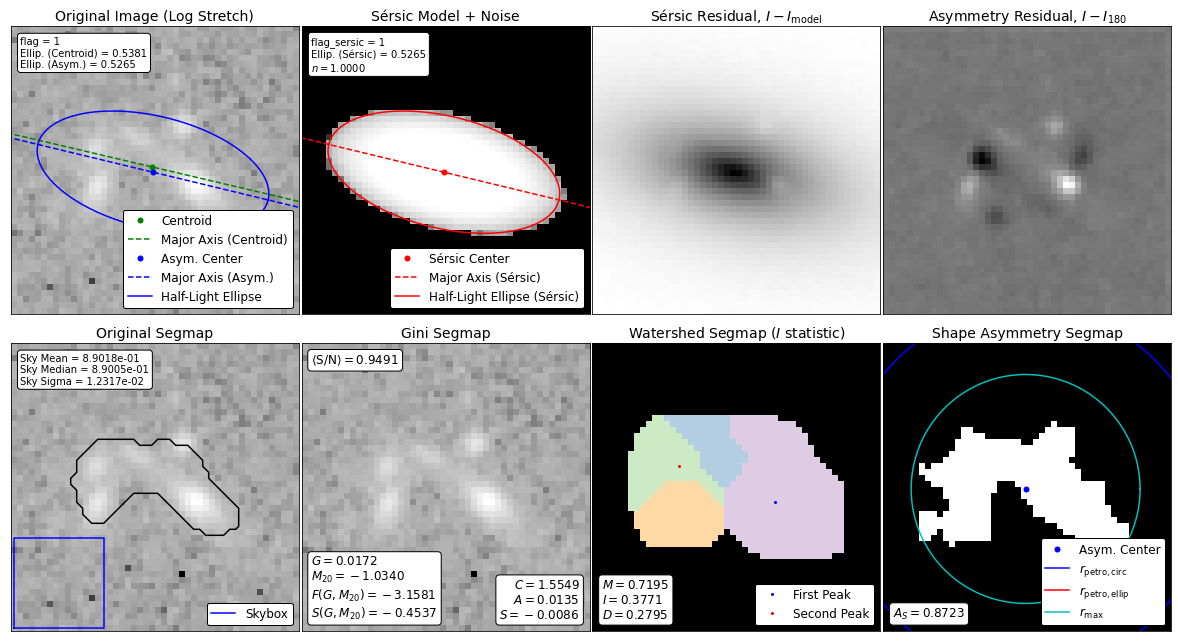

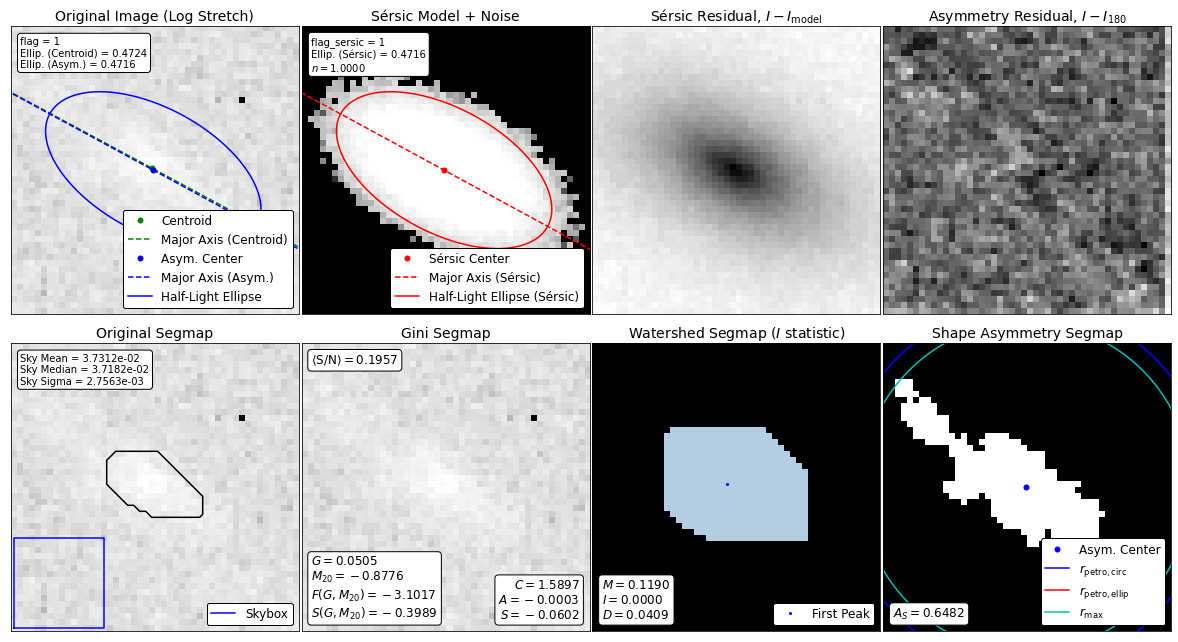

In [4]:
objidList = []
Concentration = []
Asymmetry = []
Smoothness = []
Gini = []
M20 = []
Fbulge = []
Fmerger = []
Flag = []
Flagsersic = []
sersic_amplitude = []
sersic_rhalf = []
galaxiaErro = False
for fname in filenames:
    #print(filenames)
    with fits.open(fname) as imagem:
        for i in range(len(imagem)):
            #print(fname)
            try:
                image_data = imagem[0].data
                objidl = getName(fname)
                objid = str(objidl.split('.')[0])
                print(objid)
                threshold = photutils.detect_threshold(image_data, 1.5)
                npixels = 5  # minimum number of connected pixels
                segm = photutils.detect_sources(image_data, threshold, npixels)
                #plt.imshow(segm, origin='lower',cmap='gray', norm=LogNorm())
                # Keep only the largest segment
                label = np.argmax(segm.areas) + 1
                segmap = segm.data == label
                segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
                segmap = segmap_float > 0.5
                #plt.imshow(segmap, origin='lower', cmap='gray')
                start = time.time()
                source_morphs = statmorph.source_morphology(
                image_data, segmap, gain=1)
                print('Time: %g s.' % (time.time() - start))
                morph = source_morphs[0]
                #####get morph parameters
                fig = make_figure(morph)
                plt.savefig(outputfolder+objid+'.png',facecolor='white')         
            except:
                print("Issue found")
                galaxiaErro = True
                break
        if  not galaxiaErro:
            C = morph.concentration
            A = morph.asymmetry
            S = morph.smoothness
            gini = morph.gini
            m20  = morph.m20
            bulge = morph.gini_m20_bulge
            merger = morph.gini_m20_merger
            sersicA = morph.sersic_amplitude
            sersicR = morph.sersic_rhalf
            flag = morph.flag
            flagsersic = morph.flag_sersic
            
        else:
            C = float('nan')
            A = float('nan')
            S = float('nan')
            gini = float('nan')
            m20  = float('nan')
            bulge = float('nan')
            merger = float('nan')
            flag = float('nan')
            sersicA = float('nan')
            sersicR = float('nan')
            flagsersic = float('nan')
            
        objidList.append(objid)
        Concentration.append(C)
        Asymmetry.append(A)
        Smoothness.append(S)
        Gini.append(gini)
        M20.append(m20)
        Fbulge.append(bulge)
        Fmerger.append(merger)
        sersic_amplitude.append(sersicA)
        sersic_rhalf.append(sersicR)
        Flag.append(flag)
        Flagsersic.append(flagsersic)
        galaxiaErro = False
        

objid_df  = pd.DataFrame({'objid': objidList})        
C_df = pd.DataFrame({'C':Concentration})
A_df = pd.DataFrame({'A':Asymmetry})
S_df = pd.DataFrame({'S':Smoothness})
gini_df = pd.DataFrame({'gini':Gini})
m20_df =  pd.DataFrame({'m20':M20})
bulge_df = pd.DataFrame({'bulge':Fbulge})
merger_df = pd.DataFrame({'merger':Fmerger})
flag_df = pd.DataFrame({'flag':Flag})
flag_sersic_df = pd.DataFrame({'flagsersic':Flagsersic})
sersicA_df = pd.DataFrame({'sersicA':sersic_amplitude})
sersicR_df = pd.DataFrame({'sersicR':sersic_rhalf})
######saving the table
dataFrame = pd.concat([objid_df,C_df,A_df,S_df,gini_df,m20_df,bulge_df,merger_df
                      ,sersicA_df,sersicR_df,flag_sersic_df,flag_df], axis=1)
dataFrame.to_csv(outputfolder+'teste_statmorph.csv', index=False)



print('is working')                
                
                

In [ ]:
for fname in filenames:
    #print(filenames)
    with fits.open(fname) as imagem:
        for i in range(len(imagem)):
            print(fname)
            try:
                image_data = imagem[0].data
                objidl = getName(fname)
                objid = str(objidl.split('.')[0])
                print(objid)
                
            except:
                print("Issue found")